In [259]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [138]:
data = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)

In [320]:
data.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [141]:
data[data.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [142]:
data.loc[:122,"Region"]=0
data.loc[122:,"Region"]=1
df=data

In [143]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [144]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [145]:
##remove the 122nd row
df.drop(123,axis=0,inplace=True)

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          245 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    object 
 4    RH          244 non-null    object 
 5    Ws          244 non-null    object 
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       245 non-null    float64
dtypes: float64(1), object(14)
memory usage: 30.6+ KB


In [147]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [148]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1.0


In [149]:
df.dropna(inplace=True)

In [150]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    object 
 1   month        243 non-null    object 
 2   year         243 non-null    object 
 3   Temperature  243 non-null    object 
 4    RH          243 non-null    object 
 5    Ws          243 non-null    object 
 6   Rain         243 non-null    object 
 7   FFMC         243 non-null    object 
 8   DMC          243 non-null    object 
 9   DC           243 non-null    object 
 10  ISI          243 non-null    object 
 11  BUI          243 non-null    object 
 12  FWI          243 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       243 non-null    float64
dtypes: float64(1), object(14)
memory usage: 30.4+ KB


In [152]:
df.columns = df.columns.str.strip()

In [153]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [154]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [155]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] = df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    object 
 7   FFMC         243 non-null    object 
 8   DMC          243 non-null    object 
 9   DC           243 non-null    object 
 10  ISI          243 non-null    object 
 11  BUI          243 non-null    object 
 12  FWI          243 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       243 non-null    float64
dtypes: float64(1), int32(6), object(8)
memory usage: 24.7+ KB


In [157]:
df['day'].value_counts()

1     8
17    8
30    8
29    8
28    8
27    8
26    8
25    8
24    8
23    8
22    8
21    8
20    8
19    8
18    8
16    8
2     8
15    8
13    8
12    8
11    8
10    8
9     8
8     8
7     8
6     8
5     8
4     8
3     8
14    7
31    4
Name: day, dtype: int64

In [261]:
obj = [column for column in df.columns if df[column].dtypes=='O']

In [262]:
obj

[]

In [263]:
for i in obj:
    if i!='Classes':
        df[i]=df[i].astype(float)

In [264]:
df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.563786,0.497942
std,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.496938,0.501028
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000,0.000000
25%,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000,0.000000
50%,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,1.000000,0.000000
75%,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000,1.000000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,1.000000


In [265]:
df.iloc[[122]]

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
124,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,0,1.0


In [266]:
df['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [267]:
df.to_csv('Algerial_dataset.csv',index=False)

In [268]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


In [269]:
df_copy  = df.copy()

In [270]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


In [271]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


In [272]:
df_copy['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [273]:
df_copy.drop(['day','month','year'],axis=1,inplace=True)

KeyError: "['day' 'month' 'year'] not found in axis"

In [274]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


In [275]:
df_copy['Classes'] = np.where(df_copy['Classes'].str.contains('not fire'),0,1)

AttributeError: Can only use .str accessor with string values!

In [276]:
df_copy['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [277]:
# Ploting

In [278]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


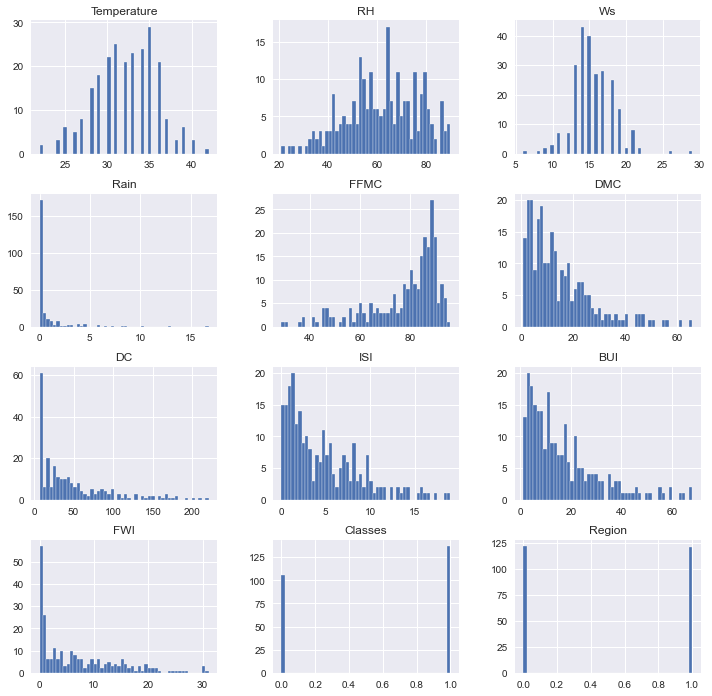

In [279]:
plt.style.use('seaborn')
df_copy.hist(bins=50,figsize=(12,12))

plt.show()



<AxesSubplot:xlabel='Classes', ylabel='count'>

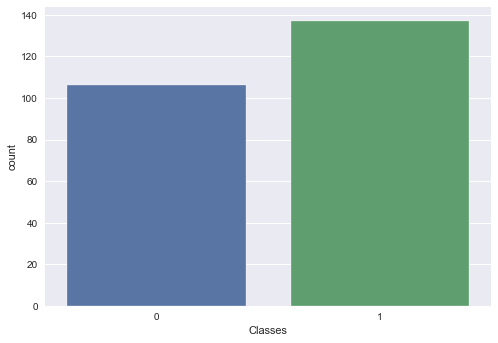

In [280]:
sns.countplot(x='Classes',data=df_copy)

In [281]:
corr = df_copy.corr()

In [282]:
corr

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<AxesSubplot:>

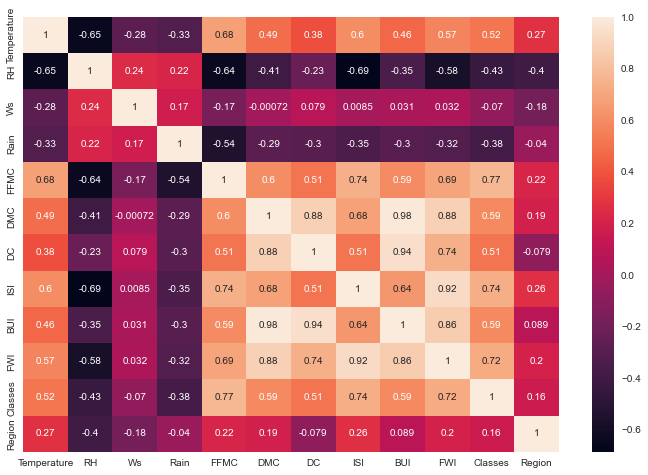

In [283]:
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FWI'>

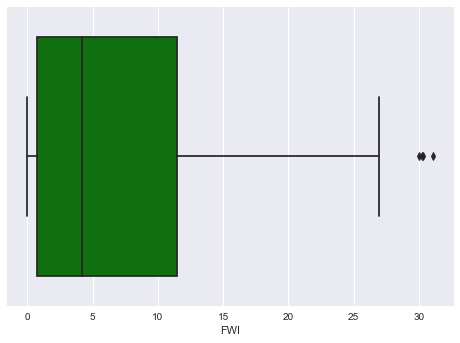

In [284]:
sns.boxplot(df['FWI'],color='green')

In [285]:
df['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [286]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


In [287]:
df['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [288]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),"Not Fire","Fire")

AttributeError: Can only use .str accessor with string values!

In [ ]:
df['Classes'].value_counts()

In [ ]:
## Monthly Fire Analysis
dftemp=df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=dftemp)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Sidi- Bel Regions",weight='bold')

In [ ]:
## Monthly Fire Analysis
dftemp=df.loc[df['Region']==0]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=dftemp)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Brjaia Regions",weight='bold')

In [ ]:
## Model

In [ ]:
df['Classes'] = np.where(df['Classes'].str.contains('Not Fire'),0,1)



In [289]:
df['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [290]:
df.drop(['day','month','year'],axis=1,inplace=True)

KeyError: "['day' 'month' 'year'] not found in axis"

In [291]:
# X and y

X = df.drop('FWI',axis=1)
y = df['FWI']

In [292]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
241,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1.0
242,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1.0
243,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1.0
244,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1.0


In [293]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
241    6.5
242    0.0
243    0.2
244    0.7
245    0.5
Name: FWI, Length: 243, dtype: float64

In [294]:
# Train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2,random_state=42)




In [295]:
X_train

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
115,29,65,19,0.6,68.3,5.5,15.2,1.5,5.8,0,0.0
210,33,37,16,0.0,92.2,61.3,167.2,13.1,64.0,1,1.0
160,38,43,13,0.5,85.0,13.0,35.4,4.1,13.7,1,1.0
134,31,42,21,0.0,90.6,18.2,30.5,13.4,18.0,1,1.0
84,34,64,14,0.0,88.9,40.5,171.3,9.0,50.9,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,7.3,0.2,1.4,0,0.0
14,28,80,17,3.1,49.4,3.0,7.4,0.4,3.0,0,0.0
92,25,76,17,7.2,46.0,1.3,7.5,0.2,1.8,0,0.0
182,34,59,16,0.0,88.1,19.5,47.2,7.4,19.5,1,1.0


In [296]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.653725,-0.308149,-0.313112,0.690285,0.468911,0.372163,0.613138,0.446280,0.539642,0.258344
RH,-0.653725,1.000000,0.211645,0.239441,-0.649239,-0.401836,-0.220945,-0.714640,-0.346511,-0.454926,-0.408441
Ws,-0.308149,0.211645,1.000000,0.235922,-0.176596,0.004712,0.092866,-0.002300,0.037465,-0.075322,-0.202357
Rain,-0.313112,0.239441,0.235922,1.000000,-0.547864,-0.288538,-0.301110,-0.349903,-0.299179,-0.378585,-0.057382
FFMC,0.690285,-0.649239,-0.176596,-0.547864,1.000000,0.611978,0.519513,0.751819,0.598248,0.786012,0.254770
DMC,0.468911,-0.401836,0.004712,-0.288538,0.611978,1.000000,0.876122,0.679049,0.983891,0.606775,0.188980
DC,0.372163,-0.220945,0.092866,-0.301110,0.519513,0.876122,1.000000,0.512934,0.946181,0.538893,-0.083038
ISI,0.613138,-0.714640,-0.002300,-0.349903,0.751819,0.679049,0.512934,1.000000,0.637669,0.740072,0.291889
BUI,0.446280,-0.346511,0.037465,-0.299179,0.598248,0.983891,0.946181,0.637669,1.000000,0.602102,0.090326
Classes,0.539642,-0.454926,-0.075322,-0.378585,0.786012,0.606775,0.538893,0.740072,0.602102,1.000000,0.196276


<AxesSubplot:>

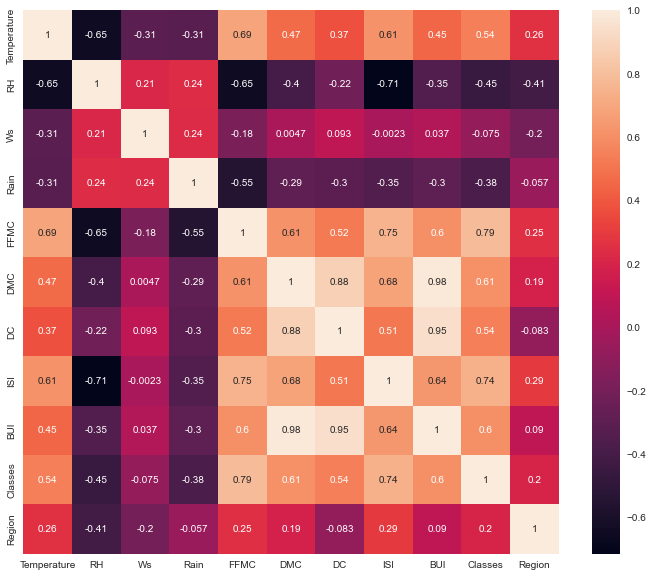

In [297]:
## Check for multicollinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [300]:
# Check Multicolinearity
def collinear(dataset ,threshold):
    coll_name = set()
    coll_mat = dataset.corr()
    for i in range(len(coll_mat.columns)):
        for j in range(i):
            if abs(coll_mat.iloc[i, j]) > threshold:
                col_name = coll_mat.columns[i]
                coll_name.add(col_name)
                
    return coll_name

In [301]:
colinear_feacture = collinear(X_train,0.85)

In [302]:
colinear_feacture

{'BUI', 'DC'}

In [303]:
X_train.drop(colinear_feacture,axis=1,inplace=True)
X_test.drop(colinear_feacture,axis=1,inplace=True)

In [304]:
X_train.shape,X_test.shape

((194, 9), (49, 9))

In [305]:
X_train.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
115,29,65,19,0.6,68.3,5.5,1.5,0,0.0
210,33,37,16,0.0,92.2,61.3,13.1,1,1.0
160,38,43,13,0.5,85.0,13.0,4.1,1,1.0
134,31,42,21,0.0,90.6,18.2,13.4,1,1.0
84,34,64,14,0.0,88.9,40.5,9.0,1,0.0


In [306]:
X_train

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
115,29,65,19,0.6,68.3,5.5,1.5,0,0.0
210,33,37,16,0.0,92.2,61.3,13.1,1,1.0
160,38,43,13,0.5,85.0,13.0,4.1,1,1.0
134,31,42,21,0.0,90.6,18.2,13.4,1,1.0
84,34,64,14,0.0,88.9,40.5,9.0,1,0.0
...,...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,0.2,0,0.0
14,28,80,17,3.1,49.4,3.0,0.4,0,0.0
92,25,76,17,7.2,46.0,1.3,0.2,0,0.0
182,34,59,16,0.0,88.1,19.5,7.4,1,1.0


## Feature Scaling

In [307]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [309]:
X_train

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
115,29,65,19,0.6,68.3,5.5,1.5,0,0.0
210,33,37,16,0.0,92.2,61.3,13.1,1,1.0
160,38,43,13,0.5,85.0,13.0,4.1,1,1.0
134,31,42,21,0.0,90.6,18.2,13.4,1,1.0
84,34,64,14,0.0,88.9,40.5,9.0,1,0.0
...,...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,0.2,0,0.0
14,28,80,17,3.1,49.4,3.0,0.4,0,0.0
92,25,76,17,7.2,46.0,1.3,0.2,0,0.0
182,34,59,16,0.0,88.1,19.5,7.4,1,1.0


## Box plot for before scaled and after

Text(0.5, 1.0, 'X_train After Scaling')

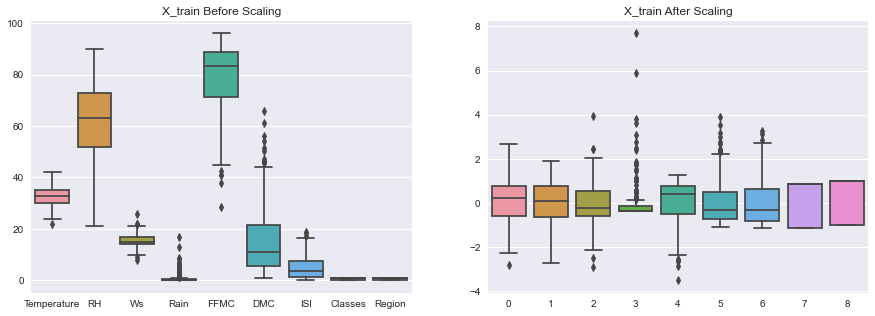

In [321]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

## Model Training

In [311]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

model = LinearRegression()
model.fit(X_train_scaled,y_train)

y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test,y_pred)
mse =  mean_squared_error(y_test,y_pred)

rmse = np.sqrt(mse)

r2 = r2_score(y_test,y_pred)

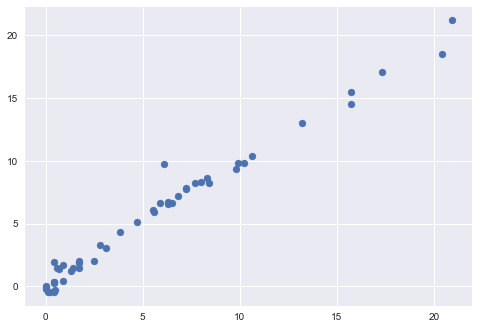

In [312]:
plt.scatter(y_test,y_pred)

In [313]:
print('mean absoluate error is: ', mae)

print('mean squred error is: ', mse)
print(' root mean squred error is: ', rmse)

print('R2 is: ',r2)


mean absoluate error is:  0.5049978694165672
mean squred error is:  0.5882990110708672
 root mean squred error is:  0.7670065260940531
R2 is:  0.9805895859259882


## Applying Lasso Regraction

In [314]:
from sklearn.linear_model import Lasso

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

lasso = Lasso()
lasso.fit(X_train_scaled,y_train)

y_pred_lasso = lasso.predict(X_test_scaled)

mae_lasso = mean_absolute_error(y_test,y_pred_lasso)

mse_lasso = mean_squared_error(y_test,y_pred_lasso)

rmse = np.sqrt(mse_lasso)

r2_laso =r2_score(y_test,y_pred_lasso)

print(' Metrix', r2_laso)


 Metrix 0.9430507350726562


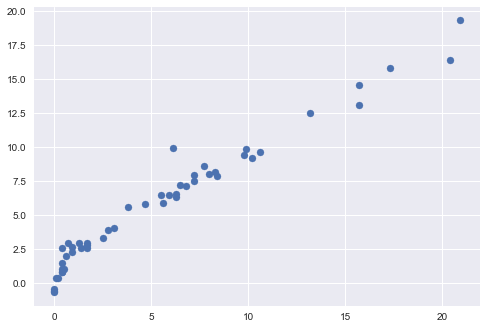

In [315]:
plt.scatter(y_test,y_pred_lasso)

## Apply Crossvalidation by Lasso CV

In [318]:
from sklearn.linear_model import LassoCV

l_cv = LassoCV(cv=5)

l_cv.fit(X_train_scaled,y_train)

y_lasso_cv = l_cv.predict(X_test_scaled)



Mean absolute error 0.5556715031617872
R2 Score 0.978328234520343


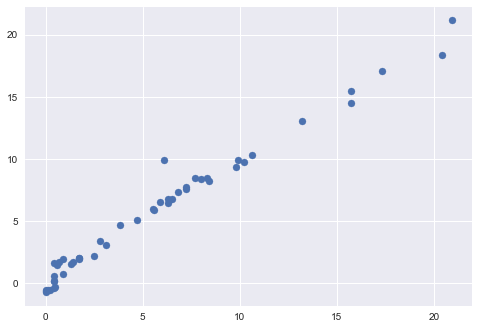

In [319]:
plt.scatter(y_test,y_lasso_cv)
mae=mean_absolute_error(y_test,y_lasso_cv)
score=r2_score(y_test,y_lasso_cv)
print("Mean absolute error", mae)
print("R2 Score", score)

## Ridge Regraction

In [334]:
from sklearn.linear_model import Ridge

ridge = Ridge()

ridge.fit(X_train_scaled,y_train)

y_pred_ride = ridge.predict(X_test_scaled)

mae_ridge = mean_absolute_error(y_test,y_pred_ride)

mse_ridge = mean_squared_error(y_test,y_pred_ride)

r2_ridge = r2_score(y_test,y_pred_ride)


In [335]:
mse_ridge,r2_ridge

(0.6029616070548649, 0.9801058063273599)

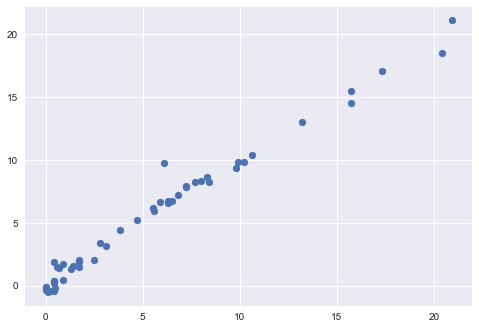

In [326]:
plt.scatter(y_test,y_pred_ride)

## Ridge Crossvalidation

In [330]:
from sklearn.linear_model import RidgeCV

ride_cv = RidgeCV(cv=5)
ride_cv.fit(X_train_scaled,y_train)

y_ride_cv = ride_cv.predict(X_test_scaled)


mae_ridge_cv = mean_absolute_error(y_test,y_ride_cv)

mse_ridge_cv = mean_squared_error(y_test,y_ride_cv)

r2_ridge_cv = r2_score(y_test,y_ride_cv)



In [331]:
r2_ridge_cv,mse_ridge_cv

(0.9722193780965624, 0.8419867979327533)

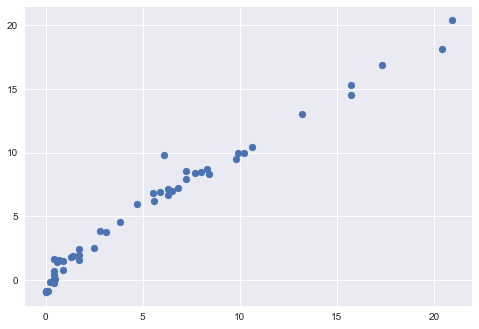

In [332]:
plt.scatter(y_test,y_ride_cv)

## Pickle the ml model & preprocessing standard scaler

In [333]:
sc

StandardScaler()

In [336]:
ridge

Ridge()

In [337]:
import pickle

pickle.dump(sc,open('scaler.pkl','wb'))

pickle.dump(ridge,open('ridge.pkl','wb'))







